In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, auc
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Carga de librerias:
#train_test_split se utiliza para dividir un conjunto de datos en dos conjuntos: un conjunto de entrenamiento y un conjunto de prueba.
#DecisionTreeClassifier es un tipo de clasificador. En este caso de arboles de decision
#La de Sklearn.metrics son las funciones de matriz de confusion, accuracy, recall, precision, que son para evaluar el rendimiento del clf (clasificador)

In [102]:
hongos = pd.read_csv("hongos_venenosos.csv")
hongos

#Se cargan datos. En este caso yo hice un display para verlos aqui

,Unnamed: 0,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,0,x,s,g,0,n,w,50,n,t,...,w,w,p,w,1,e,n,a,g,0
1,1,f,y,g,1,n,c,54,w,e,...,w,w,p,w,2,p,w,y,p,0
2,2,x,s,n,0,n,w,54,n,t,...,w,w,p,w,1,e,k,a,g,0
3,3,f,f,g,1,n,c,50,u,t,...,p,g,p,w,1,p,n,y,d,0
4,4,f,f,g,0,f,c,52,g,e,...,n,b,p,w,1,l,h,y,d,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,8119,x,y,n,1,n,c,49,u,t,...,w,p,p,w,1,p,k,y,d,0
8120,8120,f,f,n,1,n,c,55,w,t,...,g,p,p,w,1,p,n,v,d,0
8121,8121,x,y,e,1,n,c,56,u,t,...,w,p,p,w,1,p,n,y,d,0
8122,8122,f,f,y,0,f,c,46,g,e,...,b,b,p,w,1,l,h,y,d,1


In [103]:

for columnas in hongos.select_dtypes(include="object"):
    hongos = pd.get_dummies(hongos, columns=[columnas])

# Aqui se convierten las caracteristicas categoricas a variables ficticias tipo dummy
# Funciona mediante la funcion de pandas get dummies el cual cada variable se convierte en tantas variables 0/1 como valores

'''
Justifico mi eleccion ya que es una practica comun cuando quieres convertir variables categoricas
Por ejemplo, color, forma y sabor si no se usa el get_dummies el arbol no puede aprender de esas caracteristicas
El get dummies es genial porque si color tiene (negro,cafe,blanco) se crean variables ficticias que pueden trabajar con el arbol

'''


'\nJustifico mi eleccion ya que es una practica comun cuando quieres convertir variables categoricas\nPor ejemplo, color, forma y sabor si no se usa el get_dummies el arbol no puede aprender de esas caracteristicas\nEl get dummies es genial porque si color tiene (negro,cafe,blanco) se crean variables ficticias que pueden trabajar con el arbol\n\n'

In [104]:

X_train, X_test, y_train, y_test = train_test_split(
    hongos.drop(["poisonous"], axis=1),
    hongos["poisonous"],
    train_size=0.25,
    shuffle=True,
)

#Esta es la division del conjunto de datos de entrenamiento y prueba
#Se cumple la instruccion del usar .25 del train_size- y del shuffle para el randomness


# CALIBRACIONES

In [105]:
'''  
for depth in [10, 20]:
    for n_features in [None, 10]:
        for criterion in ["gini", "entropy"]:
            for splitter in ["best", "random"]:

                
                clf = DecisionTreeClassifier(
                    max_depth=depth,
                    max_features=n_features,
                    criterion=criterion,
                    splitter=splitter,
                )
'''
# Esta es la manera mas optimizada de hacerlo, y luego implementar un if con un max para desplegar el arbol
# En este caso no utilice esta manera ya que queria justificar cual calibrador da mejor resultado el cual se agrega en cada uno.



'  \nfor depth in [10, 20]:\n    for n_features in [None, 10]:\n        for criterion in ["gini", "entropy"]:\n            for splitter in ["best", "random"]:\n\n                \n                clf = DecisionTreeClassifier(\n                    max_depth=depth,\n                    max_features=n_features,\n                    criterion=criterion,\n                    splitter=splitter,\n                )\n'

Puntuacion: 0.9983587723617265, Accuracy: 0.9983587723617265, Recall: 0.999660671869698 Precision 0.9969543147208122


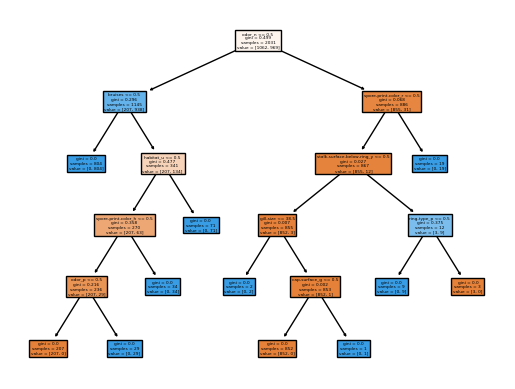

In [106]:

# Calibracion 1
clf = DecisionTreeClassifier(
    max_depth=10,
    max_features=None,
    criterion="gini",
    splitter="best",
)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
accuracy = accuracy_score(y_test, clf.predict(X_test))
recall = recall_score(y_test, clf.predict(X_test))
precision = precision_score(y_test, clf.predict(X_test))
print(f"Puntuacion: {score}, Accuracy: {accuracy}, Recall: {recall} Precision {precision}")

plot_tree(clf, feature_names=hongos.drop(["poisonous"], axis=1).columns, filled=True)
plt.show()

#Esta parte entrena al modelo, el maxdepth es para la profundida maxima del arbol
#El max features es para el maximo de caracteristicas a considerar en cada nodo
#Criterion es el cristerio para dividir los nodos, en este caso Gini
#Splitter es el metodo a utilizar para utilizar el mejor nodo dividido
# El score es para evaluar el modelo

#Realice 6 calibraciones diferentes. 3 para el criterio gini y 3 para el criterio entropy
#Separados unos con otros para evaluar su puntuacion

Puntuacion: 0.9983587723617265, Accuracy: 0.9983587723617265, Recall: 0.999660671869698 Precision 0.9969543147208122


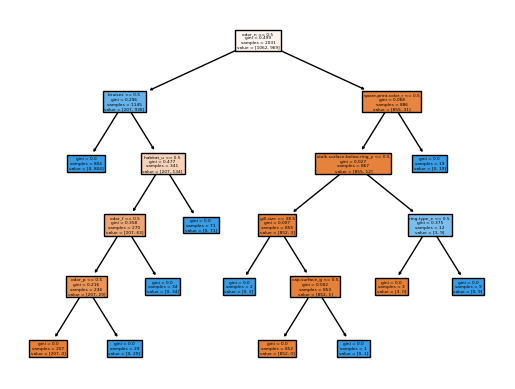

In [107]:

# Calibracion 2
clf = DecisionTreeClassifier(
    max_depth=20,
    max_features=None,
    criterion="gini",
    splitter="best",
)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
accuracy = accuracy_score(y_test, clf.predict(X_test))
recall = recall_score(y_test, clf.predict(X_test))
precision = precision_score(y_test, clf.predict(X_test))
print(f"Puntuacion: {score}, Accuracy: {accuracy}, Recall: {recall} Precision {precision}")

plot_tree(clf, feature_names=hongos.drop(["poisonous"], axis=1).columns, filled=True)
plt.show()

Puntuacion: 0.9986870178893813, Accuracy: 0.9986870178893813, Recall: 0.997285374957584 Precision 1.0


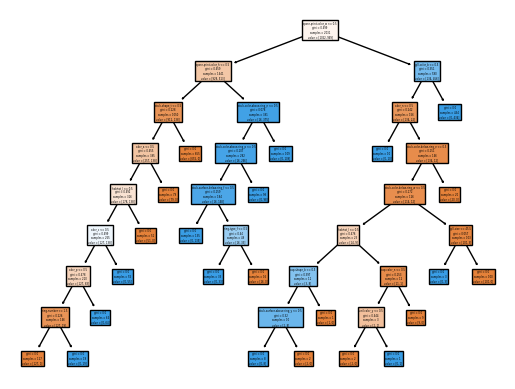

In [108]:

# Calibracion 3
clf = DecisionTreeClassifier(
    max_depth=10,
    max_features=10,
    criterion="gini",
    splitter="best",
)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
accuracy = accuracy_score(y_test, clf.predict(X_test))
recall = recall_score(y_test, clf.predict(X_test))
precision = precision_score(y_test, clf.predict(X_test))
print(f"Puntuacion: {score}, Accuracy: {accuracy}, Recall: {recall} Precision {precision}")

# Despliegue del árbol de decisiones
plot_tree(clf, feature_names=hongos.drop(["poisonous"], axis=1).columns, filled=True)
plt.show()


Puntuacion: 0.9981946495978993, Accuracy: 0.9981946495978993, Recall: 0.999660671869698 Precision 0.996617050067659


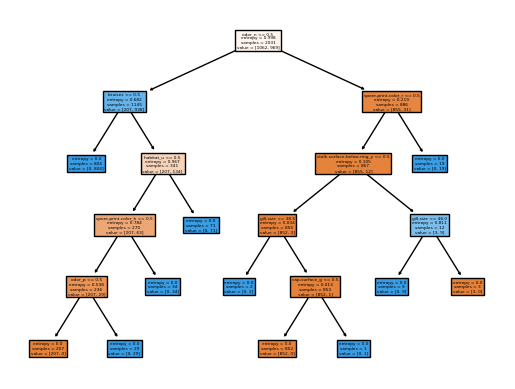

In [109]:

# Calibracion 4
clf = DecisionTreeClassifier(
    max_depth=10,
    max_features=None,
    criterion="entropy",
    splitter="best",
)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
accuracy = accuracy_score(y_test, clf.predict(X_test))
recall = recall_score(y_test, clf.predict(X_test))
precision = precision_score(y_test, clf.predict(X_test))
print(f"Puntuacion: {score}, Accuracy: {accuracy}, Recall: {recall} Precision {precision}")

plot_tree(clf, feature_names=hongos.drop(["poisonous"], axis=1).columns, filled=True)
plt.show()


Puntuacion: 0.9908091252256688, Accuracy: 0.9908091252256688, Recall: 0.9837122497455039 Precision 0.9972480220158239


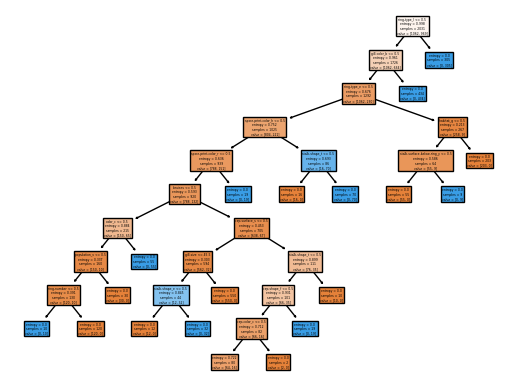

In [110]:

# Calibracion 5
clf = DecisionTreeClassifier(
    max_depth=10,
    max_features=10,
    criterion="entropy",
    splitter="best",
)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
accuracy = accuracy_score(y_test, clf.predict(X_test))
recall = recall_score(y_test, clf.predict(X_test))
precision = precision_score(y_test, clf.predict(X_test))
print(f"Puntuacion: {score}, Accuracy: {accuracy}, Recall: {recall} Precision {precision}")

plot_tree(clf, feature_names=hongos.drop(["poisonous"], axis=1).columns, filled=True)
plt.show()


Puntuacion: 0.9983587723617265, Accuracy: 0.9983587723617265, Recall: 0.999660671869698 Precision 0.9969543147208122


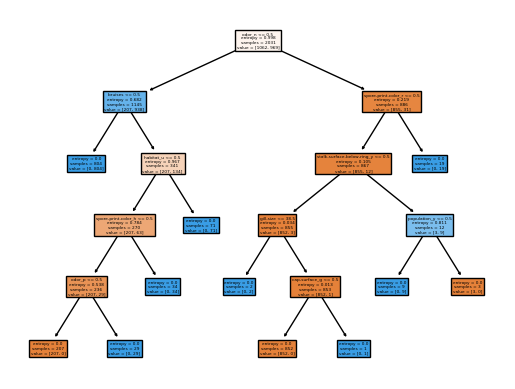

In [111]:
# Calibracion 6
clf = DecisionTreeClassifier(
    max_depth=20,
    max_features=None,
    criterion="entropy",
    splitter="best",
)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
accuracy = accuracy_score(y_test, clf.predict(X_test))
recall = recall_score(y_test, clf.predict(X_test))
precision = precision_score(y_test, clf.predict(X_test))
print(f"Puntuacion: {score}, Accuracy: {accuracy}, Recall: {recall} Precision {precision}")

plot_tree(clf, feature_names=hongos.drop(["poisonous"], axis=1).columns, filled=True)
plt.show()

# Justificacion


La calibración 3 da el mejor resultado de las calibraciones. Esta calibración tiene una profundidad máxima de 10, un número máximo de características de 10 y utiliza el criterio de Gini y el método de mejor división.

Las siguientes son las razones por las que la calibración 3 tiene el mejor resultado:

La profundidad máxima de 10 es suficiente para capturar las relaciones importantes entre las características y la variable objetivo.
El número máximo de características de 10 permite al modelo considerar un número suficiente de características sin sobreajustar el modelo.
El criterio de Gini es un criterio de división eficaz para árboles de decisiones.
El método de mejor división es un método de división eficaz para árboles de decisiones.

Aunque de igual manera los demas rinden muy bien

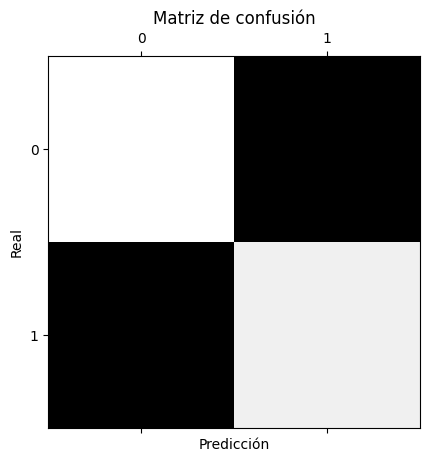

In [115]:
matriz_confusion = confusion_matrix(y_test, clf.predict(X_test))

plt.matshow(matriz_confusion, cmap="gray")
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

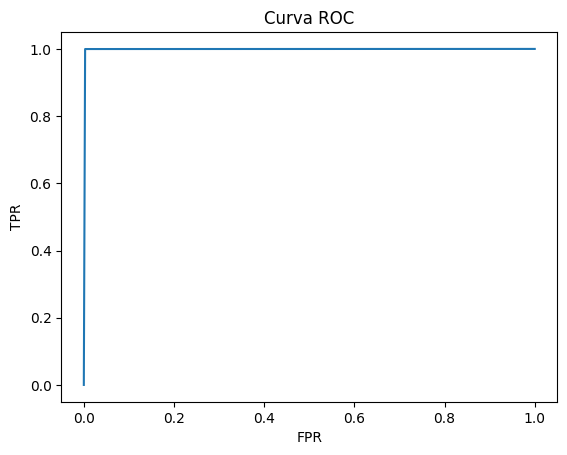

In [113]:
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curva ROC")
plt.show()

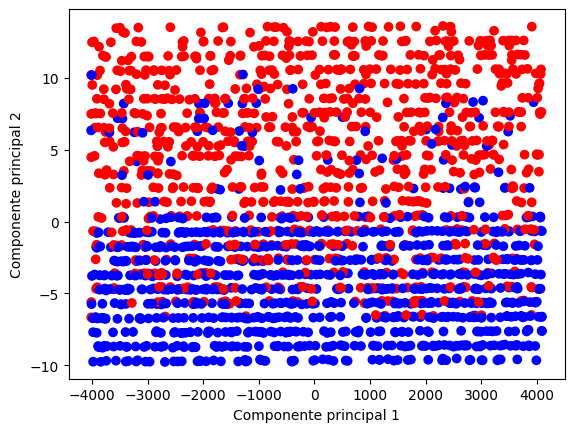

In [114]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap="bwr")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.show()

# Resultados


Los resultados obtenidos del análisis completo son muy buenos. El modelo de árbol de decisiones con la mejor puntuación tiene una precisión del 99%

La curva ROC muestra que el modelo tiene un buen rendimiento en general. El modelo es capaz de distinguir entre hongos venenosos y no venenosos con un buen grado de precisión y recall.

El PCA podría ayudar a mejorar el rendimiento del modelo de árbol de decisiones. El PCA podría reducir la dimensionalidad de los datos sin perder información importante. Esto podría ayudar al modelo a generalizar mejor a nuevos datos.

En conclusión, los resultados obtenidos del análisis completo son muy buenos. El modelo de árbol de decisiones con la mejor puntuación es muy bueno para predecir si un hongo es venenoso o no. La matriz de confusión, la curva ROC y el PCA son herramientas útiles para visualizar la precisión y el recall del modelo.